# Funciones de distribución de probabilidades

In [ ]:
# Funcion de distrbución de probabilidad (PDF)
# PDF = Probability Density Function
# Forma acampanada
# f(x) = P(X = x)
# Este valor dice poco. El hecho que tome un valor concreto es dificil por lo que tiene probabilidad 0.

# En vez de catalogar como se distribuyen los valores en base a un valor, 
# una variable aleatorea se puede definir por la Funcion de Distribucion Acumulada (CMF)

# CMF = cumulative density function
# Probabilidad de que una variable aleatorea sea menor o igual que un valor concreto

## Distribución Uniforme

In [ ]:
# Se define en base a su punto de origen de inicio y punto final.
# La probabilidad de seleccionar un número entre un número A y otro B ,
# poseen la misma probabilidad de ocurrir (todos son x probables)

# 1/(B-A)
# Hay que especificar el punto de origen y punto final

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Limite inferior => a
# Limite superior => b
# Número de muestras => n

a = 1
b = 100
n = 1000000

data = np.random.uniform(a, b, n)

(array([ 99849., 100358.,  99846.,  99680., 100340., 100102.,  99741.,
        100027.,  99958., 100099.]),
 array([ 1.00021542, 10.90015891, 20.80010241, 30.70004591, 40.5999894 ,
        50.4999329 , 60.3998764 , 70.29981989, 80.19976339, 90.09970689,
        99.99965038]),
 <a list of 10 Patch objects>)

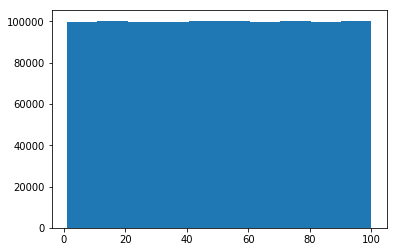

In [15]:
%matplotlib inline
plt.hist(data)

### Distribución Normal

In [ ]:
# Posee un 90% de probabilidad
# El ejemplo mas conocido es la "Campana de Gauss"

# La ley de los grandes numeros => A medida de que aumentamos la cantidad de valores analizados, da como resultado,
# o se va acercando a una distribucion normal (campana) centrada en torno a un valor
# y con una dispersion que al alejarnos mucho de la media se tiende a no tener datos para analizar

# Valores principales en la distribucion normal:

#   - Media: Es el valor central al cual se rodean los demas valores (pico central)
#   - Desviacion típica

# 0 => promedio (50% de valores a la derecha y 50% a la izquierda)
# Desviacion estandar es 1

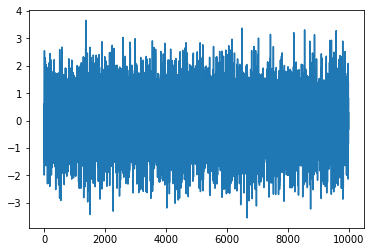

In [21]:
data2 = np.random.randn(10000)
x = range(1, 10001)
plt.plot(x, data2)

(array([  19.,  169.,  612., 1750., 2708., 2587., 1528.,  517.,   99.,
          11.]),
 array([-3.54638853, -2.82593146, -2.1054744 , -1.38501734, -0.66456028,
         0.05589678,  0.77635385,  1.49681091,  2.21726797,  2.93772503,
         3.65818209]),
 <a list of 10 Patch objects>)

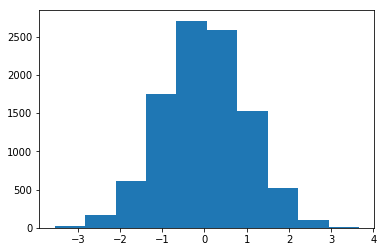

In [22]:
plt.hist(data2)

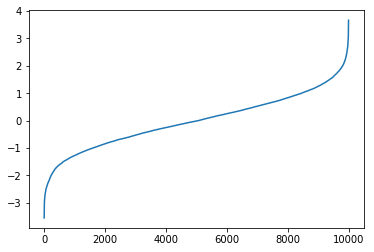

In [23]:
# sorted() => ordena

# Esto da como resultado una función de distribucion acumulada
# Si da esto se corrobora que es una funcion o distribucion gaussiana
plt.plot(x, sorted(data2))

(array([   9.,   70.,  446., 1515., 2867., 2992., 1555.,  470.,   68.,
           8.]),
 array([-4.73634147, -2.70210846, -0.66787545,  1.36635756,  3.40059057,
         5.43482358,  7.4690566 ,  9.50328961, 11.53752262, 13.57175563,
        15.60598864]),
 <a list of 10 Patch objects>)

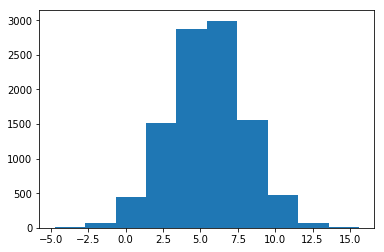

In [24]:
# ¿Que pasa si quiero buscar los valores en torno a una media y una desviacion estandar predefinidas?

# mu = Hace referencia a la media (ejemplo: nota de un examen)
# sd = Es la desviacon estandar. Es decir, 2.5 puntos arribas y 2.5 puntos abajo de 5.5

mu = 5.5
sd = 2.5
z = np.random.randn(10000)

# Entonces se puede generar una distribucion normal en base a un valor
# Esto se obtiene:   Z = (X - mu) / sd -> N(0,1), X = mu +sd * z
# Para obtener una distribucion normal

data3 = mu + sd*z
plt.hist(data3)

In [25]:
# ¿Y si quiero mas grupos de números aleatoreos o la cantidad de muestras?

# En este caso obtengo 2 colecciones de 4 elementos cada uno.
# randn con un solo parametro solo arma una coleccion con la cantidad de valores o elementos indicados
# randn sin parametros solo te crea un elemento

data4 = np.random.randn(2, 4)
data4

array([[-2.84981164, -0.51110082,  0.60573021, -0.63285239],
       [ 1.07162937, -1.18149911,  0.26658896, -0.95655974]])

## La simulación de Monte Carlo

In [ ]:
# Aplicacion de uso para la generacion de números aleatoreos
# Simula el calculo del valor exacto de PI 

# Ejemplo circulo(radio r) y cuadrado (lado = 2r)
# La probabilidad de caer dentro del circulo

# P(caerEnElCirculo)  = caerDentroDelCirculo/caerDentroDelCuadrado
# Es lo mismo que     = Área del circulo / Área Cuadrado
# Que es lo mismo que = PI * r * r / 2 * r * 2 * r
# Que al eliminar es  = PI/4

### Pasos para la simulación:
1. Se generan dos números aleatoreos uniforme entre 0 y 1, en total 1000 veces
2. Calcularemos x* x + y * y   (es la ecuación del circulo)
    * Si el valor es inferior a 1 => Estamos dentro del circulo
    * Si el valor es superior a 1 => Estamos fuera del circulo
3. Calculamos el número total de veces que están dentro del círuclo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer debtro del circulo
4. Usamos dicha probabilidad para aproximar el valor de PI
5. Repetimos el experimento para  ubn número suficiente de veces (por ejemplo 100), para obtener diferentes aproximaciones de PI
6. Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de PI.

In [40]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0 
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

        pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141084


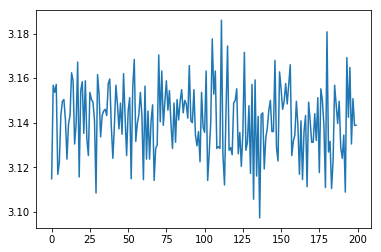

In [42]:
result = pi_montecarlo(10000, 200)

## Dummy Data Sets